In [1]:
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import urllib
import time

%matplotlib inline

In [2]:
import altair as alt

In [3]:
# using xml tool to scrape
import xml.etree.ElementTree as ET

# Galaxy NN in Arxiv

In [4]:
from arxiv_harvest import harvest

In [ ]:
# fetch all arxiv astro-ph metadata
df = harvest(
    arxiv="physics:astro-ph", 
    start_date="2016-01-01", 
    end_date="2018-11-15",
    output_filename="df_astro_16-18.csv"
)

In [5]:
df = pd.read_csv("df_astro_16-18.csv")

## Anything about NN

In [6]:
df_nn = df[df.abstract.str.contains("neural network")]
df_nn

,Unnamed: 0,title,abstract,categories,created,id,doi
1006,1006,Cosmic Ray Composition and Energy Spectrum fro...,The mass composition of high energy cosmic ray...,"['astro-ph.HE', 'astro-ph.IM']",2012-07-14,1207.34550,10.1016/j.astropartphys.2012.11.003
2414,2414,Photometric redshift estimation based on data ...,Photometric redshifts (photo-z) are crucial to...,['astro-ph.IM'],2015-01-26,1501.06506,10.1007/s10686-015-9443-4
3358,3358,ANNz2 - photometric redshift and probability d...,"We present ANNz2, a new implementation of the ...",['astro-ph.CO'],2015-07-02,1507.00490,10.1088/1538-3873/128/968/104502
3876,3876,Nuclear Mass Predictions for the Crustal Compo...,Besides their intrinsic nuclear-structure valu...,"['nucl-th', 'astro-ph.HE', 'astro-ph.SR', 'nuc...",2015-08-25,1508.06263,10.1103/PhysRevC.93.014311
4010,4010,Machine Learning Model of the Swift/BAT Trigge...,To draw inferences about gamma-ray burst (GRB)...,"['astro-ph.HE', 'physics.data-an', 'stat.ML']",2015-09-03,1509.01228,10.3847/0004-637X/818/1/55
5752,5752,Predicting Coronal Mass Ejections transit time...,Predicting transit times of Coronal Mass Eject...,['astro-ph.SR'],2015-11-24,1511.07620,10.1093/mnras/stv2782
7104,7104,An Artificial Neural Network Approach For Rank...,We present a novel technique for ranking the r...,['astro-ph.GA'],2016-01-06,1601.01258,10.1093/mnras/stw036
7439,7439,The star formation rates of active galactic nu...,Using artificial neural network (ANN) predicti...,['astro-ph.GA'],2016-01-13,1601.03349,10.1093/mnrasl/slw012
8181,8181,Asteroseismic determination of fundamental par...,The advent of space-based observatories such a...,['astro-ph.SR'],2016-02-02,1602.00902,10.1093/mnras/stw1621
8230,8230,Excess B-modes extracted from the Planck polar...,One of the main obstacles for extracting the C...,['astro-ph.CO'],2016-02-03,1602.01284,10.1002/asna.201512351


In [7]:
# ratio of neural network in the astro-ph
len(df_nn) / len(df)

0.0013

In [8]:
# How many of them are about galaxy
print(len(df_nn[df_nn.abstract.str.contains("galaxy")]) / len(df_nn))
df_nn[df_nn.abstract.str.contains("galaxy")]

0.34615384615384615


,Unnamed: 0,title,abstract,categories,created,id,doi
7104,7104,An Artificial Neural Network Approach For Rank...,We present a novel technique for ranking the r...,['astro-ph.GA'],2016-01-06,1601.01258,10.1093/mnras/stw036
7439,7439,The star formation rates of active galactic nu...,Using artificial neural network (ANN) predicti...,['astro-ph.GA'],2016-01-13,1601.03349,10.1093/mnrasl/slw012
9190,9190,SOMBI: Bayesian identification of parameter re...,This work describes the implementation and app...,"['astro-ph.CO', 'astro-ph.IM']",2016-02-26,1602.08497,10.1051/0004-6361/201628393
14077,14077,Deep Recurrent Neural Networks for Supernovae ...,"We apply deep recurrent neural networks, which...","['astro-ph.IM', 'astro-ph.CO', 'cs.LG', 'physi...",2016-06-23,1606.07442,10.3847/2041-8213/aa603d
14147,14147,Using an Artificial Neural Network to Classify...,"We present The Machine, an artificial neural n...","['astro-ph.IM', 'astro-ph.GA']",2016-06-27,1606.08133,10.1093/mnras/stx1413
16227,16227,Star-galaxy Classification Using Deep Convolut...,Most existing star-galaxy classifiers use the ...,"['astro-ph.IM', 'astro-ph.CO', 'astro-ph.GA', ...",2016-08-15,1608.04369,10.1093/mnras/stw2672
17377,17377,Photo-$z$ with CuBAN$z$: An improved photometr...,We present an improved photometric redshift es...,['astro-ph.CO'],2016-09-12,1609.03568,10.1016/j.newast.2016.09.002
18562,18562,Pattern recognition in the ALFALFA.70 and Sloa...,The application of artificial neural networks ...,['astro-ph.GA'],2016-10-07,1610.02341,10.1093/mnras/stw2606
19824,19824,METAPHOR: A machine learning based method for ...,A variety of fundamental astrophysical science...,['astro-ph.IM'],2016-11-07,1611.02162,10.1093/mnras/stw2930


## Category

In [9]:
import itertools
from collections import Counter
import re

all_category = list(itertools.chain.from_iterable(
    df_nn.categories.apply(
        lambda x: re.sub(r"[\[\]' ]", "", x).split(",") 
    ).values
))
set(all_category)

{'astro-ph.CO',
 'astro-ph.GA',
 'astro-ph.HE',
 'astro-ph.IM',
 'astro-ph.SR',
 'cs.AI',
 'cs.CV',
 'cs.LG',
 'cs.NE',
 'gr-qc',
 'hep-ex',
 'nucl-ex',
 'nucl-th',
 'physics.data-an',
 'stat.ML'}

In [10]:
one_gram_category = Counter(all_category).most_common(15)
one_gram_category

[('astro-ph.IM', 13),
 ('astro-ph.CO', 7),
 ('astro-ph.GA', 7),
 ('astro-ph.HE', 6),
 ('astro-ph.SR', 5),
 ('physics.data-an', 3),
 ('hep-ex', 2),
 ('nucl-th', 1),
 ('nucl-ex', 1),
 ('stat.ML', 1),
 ('cs.LG', 1),
 ('cs.AI', 1),
 ('cs.NE', 1),
 ('gr-qc', 1),
 ('cs.CV', 1)]

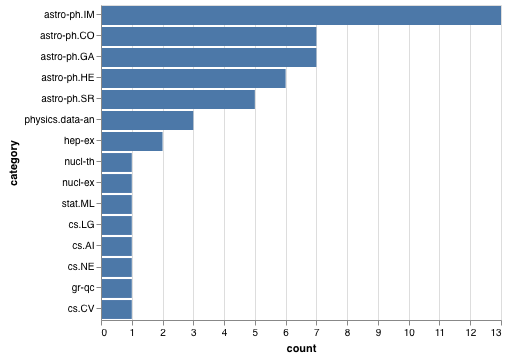

In [20]:
data = pd.DataFrame(one_gram_category, columns=["category", "count"])

alt.Chart(data).mark_bar().encode(
    x='count',
    y=alt.Y('category', sort=alt.SortField(field="freq", op="sum", order="ascending")), 
)

## N-Grams on Abstract

In [16]:
# concat all string into one big string
all_abstract = "".join(df_nn.abstract)
all_abstract = re.sub(
    r"(with |which |have |of |the |and |in |from |to |for |by |such |on |as |a |has |been |We |present |find |In |this |Sky |Survey |is |used |an |not |only |are |also |that |The |or |will |be |we )", 
    "", 
    all_abstract, 
)
all_abstract = re.sub(r"  ", " ", all_abstract, )
all_abstract = all_abstract.split(" ")

# ngrams
one_gram_abstract    = Counter(all_abstract)
two_grams_abstract   = Counter(zip(all_abstract, all_abstract[1:]))
three_grams_abstract = Counter(zip(all_abstract, all_abstract[1:], all_abstract[2:]))

In [17]:
# 1-gram
one_gram_abstract.most_common(20)

[('neural', 25),
 ('using', 20),
 ('mass', 16),
 ('network', 16),
 ('networks', 16),
 ('parameters', 15),
 ('learning', 14),
 ('photometric', 12),
 ('results', 10),
 ('based', 10),
 ('between', 10),
 ('model', 10),
 ('more', 10),
 ('galaxy', 10),
 ('machine', 9),
 ('training', 9),
 ('algorithm', 8),
 ('models', 8),
 ('method', 8),
 ('stellar', 8)]

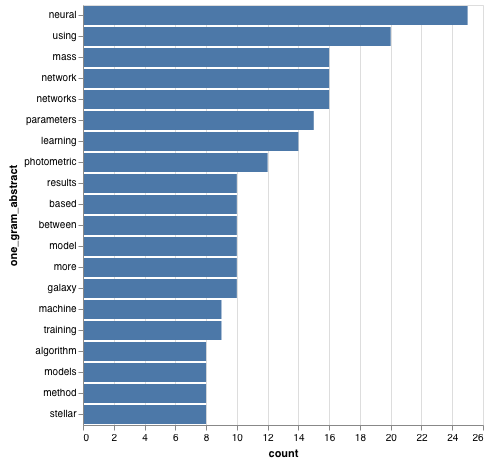

In [19]:
data = pd.DataFrame(one_gram_abstract.most_common(20), columns=["one_gram_abstract", "count"])

alt.Chart(data).mark_bar().encode(
    x='count',
    y=alt.Y('one_gram_abstract', sort=alt.SortField(field="freq", op="sum", order="ascending")), 
)

In [81]:
# 2-grams
two_grams_abstract.most_common(20)

[(('neural', 'network'), 10),
 (('machine', 'learning'), 9),
 (('neural', 'networks'), 9),
 (('artificial', 'neural'), 7),
 (('cosmic', 'ray'), 4),
 (('network', '(ANN)'), 4),
 (('neural', 'networks,'), 3),
 (('photometric', 'redshifts'), 3),
 (('study', 'cosmic'), 2),
 (('spectroscopic', 'training'), 2),
 (('residuals', 'between'), 2),
 (('boosted', 'decisitrees'), 2),
 (('support', 'vectmachines,'), 2),
 (('transit', 'times'), 2),
 (('star', 'formation.'), 2),
 (('success', 'rate'), 2),
 (('galaxy', 'properties'), 2),
 (('feasibility', 'neural'), 2),
 (('Large', 'Synoptic'), 2),
 (('light', 'curves'), 2)]

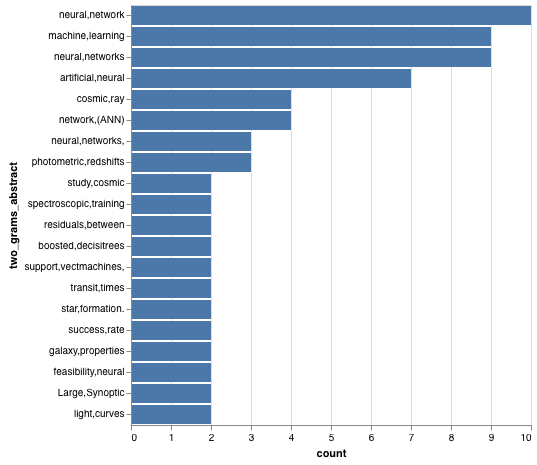

In [21]:
data = pd.DataFrame(two_grams_abstract.most_common(20), columns=["two_grams_abstract", "count"])

alt.Chart(data).mark_bar().encode(
    x='count',
    y=alt.Y('two_grams_abstract', sort=alt.SortField(field="freq", op="sum", order="ascending")), 
)

In [82]:
three_grams_abstract.most_common(20)

[(('neural', 'network', '(ANN)'), 4),
 (('artificial', 'neural', 'network'), 4),
 (('study', 'cosmic', 'ray'), 2),
 (('artificial', 'neural', 'networks'), 2),
 (('machine', 'learning', 'model'), 2),
 (('deep', 'convolutional', 'neural'), 2),
 (('convolutional', 'neural', 'networks'), 2),
 (('able', 'produce', 'accurate'), 2),
 (('mass', 'compositihigh', 'energy'), 1),
 (('compositihigh', 'energy', 'cosmic'), 1),
 (('energy', 'cosmic', 'rays'), 1),
 (('cosmic', 'rays', 'depends'), 1),
 (('rays', 'depends', 'their'), 1),
 (('depends', 'their', 'production,\nacceleration,'), 1),
 (('their', 'production,\nacceleration,', 'propagation.'), 1),
 (('production,\nacceleration,', 'propagation.', 'study'), 1),
 (('propagation.', 'study', 'cosmic'), 1),
 (('cosmic', 'ray', 'compositican\ntherefore'), 1),
 (('ray', 'compositican\ntherefore', 'reveal'), 1),
 (('compositican\ntherefore', 'reveal', 'hints'), 1)]